In [131]:
import numpy  as np
import  pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import fetch_california_housing



In [132]:
data = pd.read_csv("datasets/housing.csv")

In [133]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [134]:
data.dropna(inplace=True)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [136]:
from  sklearn.model_selection import train_test_split


X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]



X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2 , random_state=42)



In [137]:
train_data = pd.concat([X_train,y_train], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,<1H OCEAN,273400.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,<1H OCEAN,160800.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,<1H OCEAN,335400.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,NEAR BAY,231200.0


<Axes: >

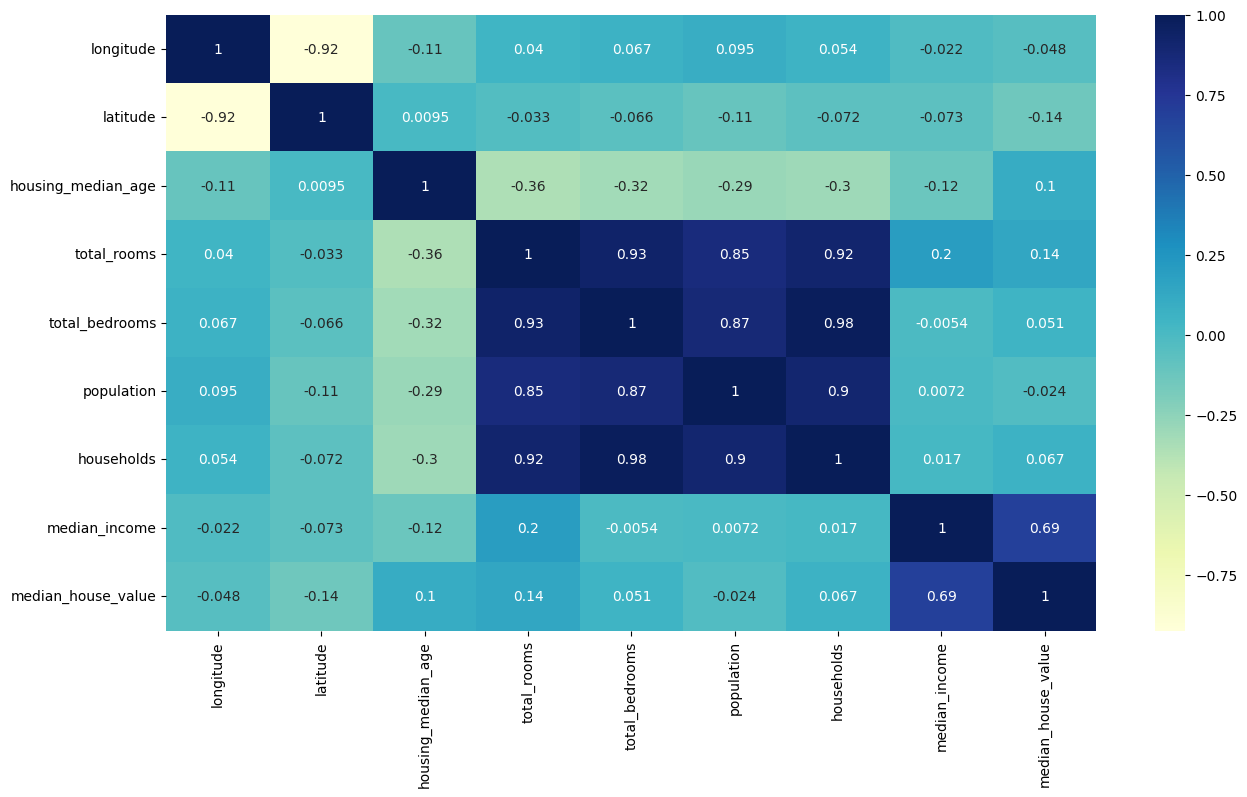

In [138]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [139]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

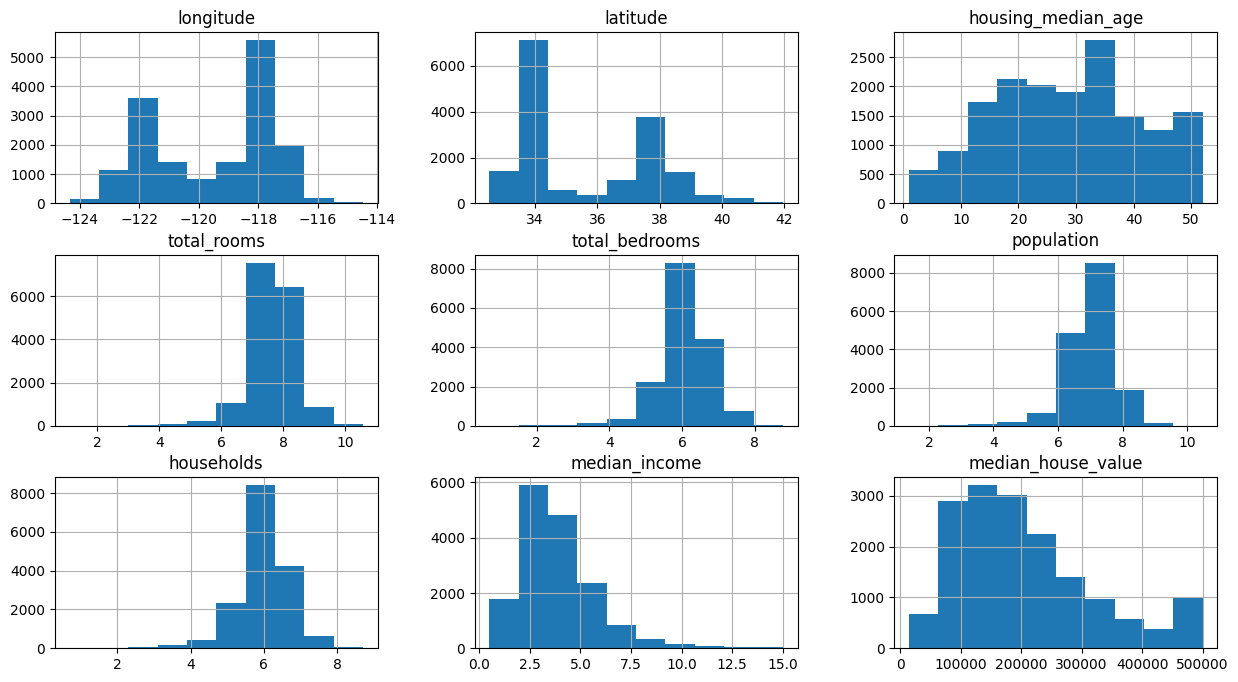

In [140]:
train_data.hist(figsize= (15,8))

In [141]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [142]:


train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop("ocean_proximity", axis=1)

<Axes: >

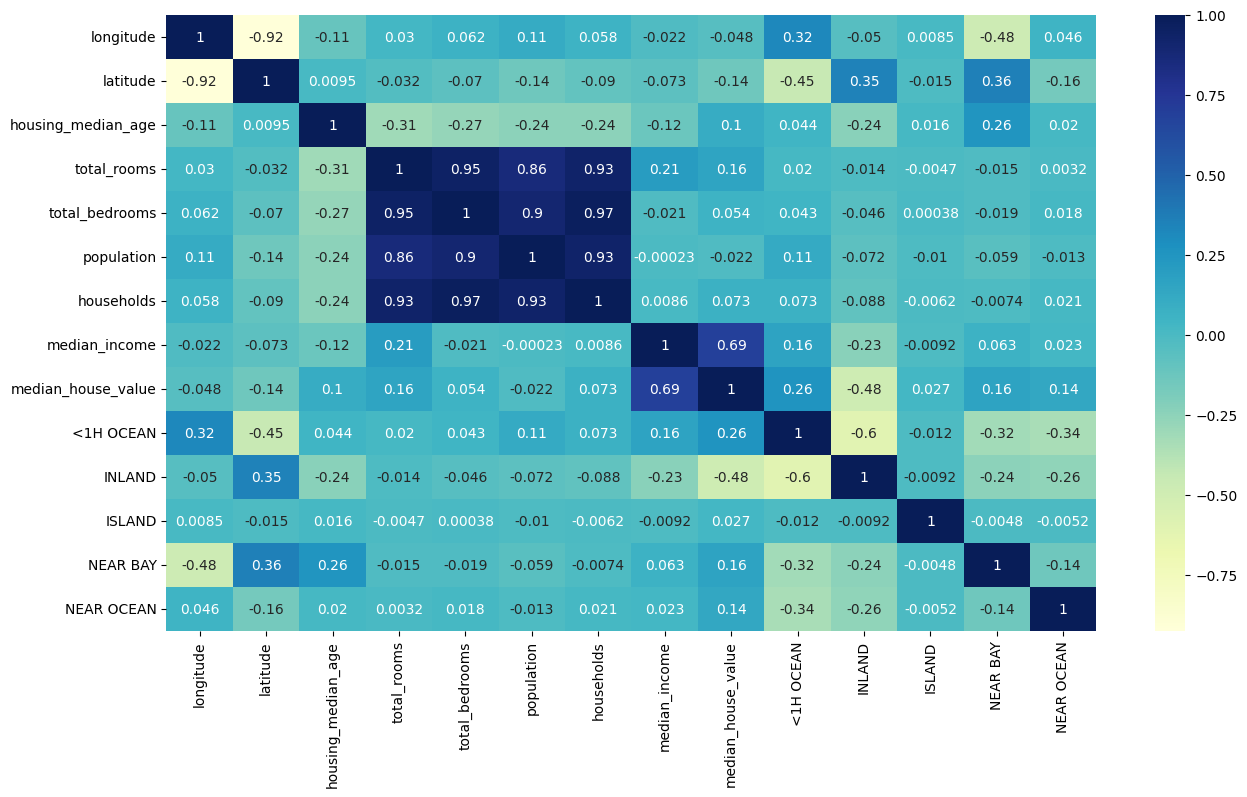

In [143]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot =True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

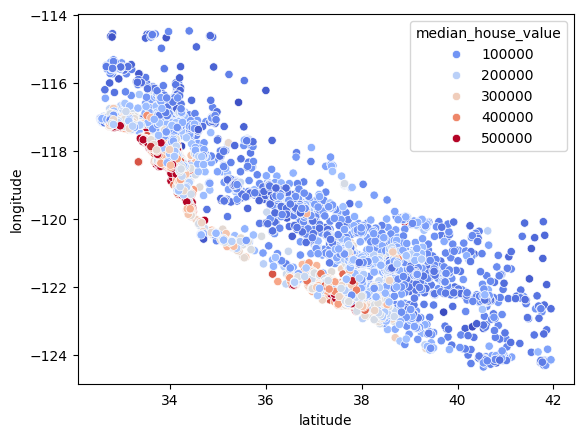

In [144]:
sns.scatterplot(x="latitude", y="longitude", hue = "median_house_value", data= train_data, palette="coolwarm", sizes=(20,200))

In [145]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]

train_data["households_rooms"] = train_data["total_rooms"]/train_data["households"]


<Axes: >

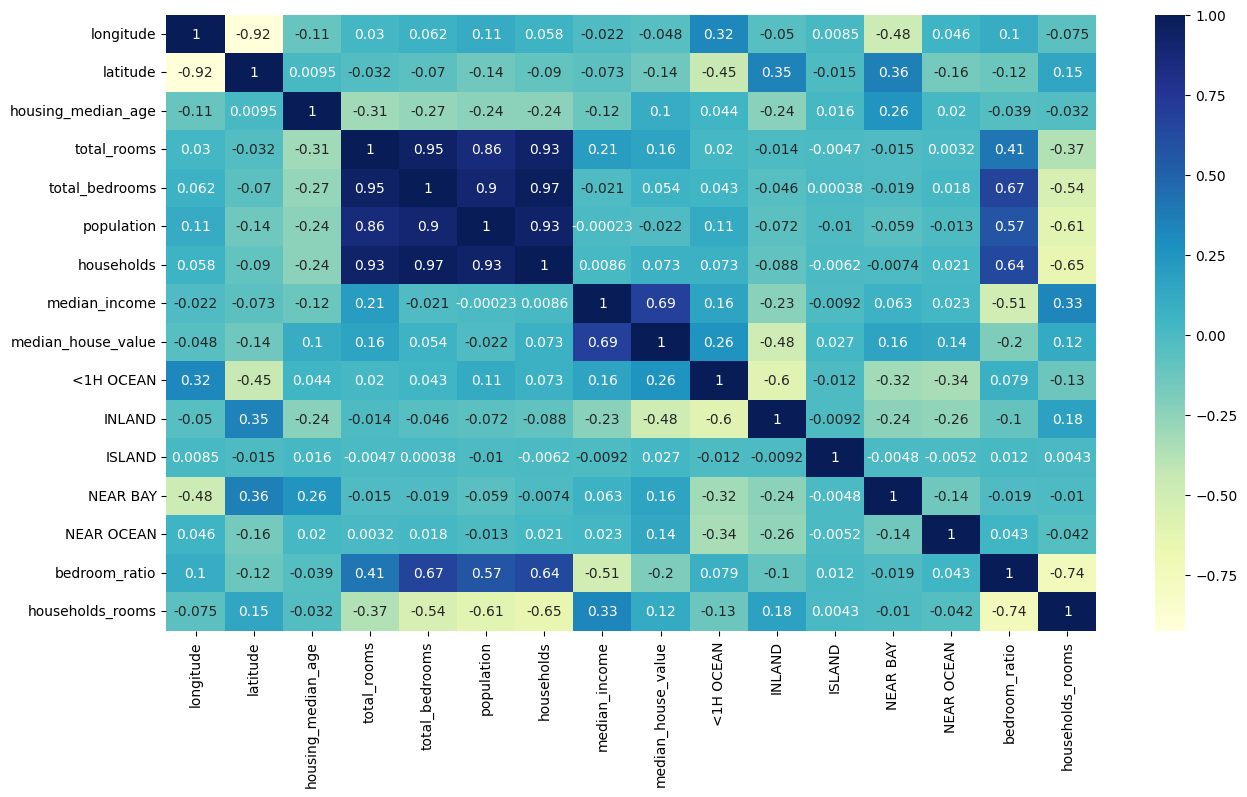

In [146]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [147]:
from  sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler


scaler =  StandardScaler()

X_train, y_train  = train_data.drop("median_house_value", axis=1), train_data["median_house_value"]

X_train_scaled = scaler.fit_transform(X_train)
model = LinearRegression()

model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [148]:
test_data = pd.concat([X_test,y_test], axis=1)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)


test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop("ocean_proximity", axis=1)
test_data["bedroom_ratio"] = test_data["total_bedrooms"]/test_data["total_rooms"]

test_data["households_rooms"] = test_data["total_rooms"]/test_data["households"]


In [149]:
X_test, y_test  = test_data.drop("median_house_value", axis=1), test_data["median_house_value"]

X_test_scaled = scaler.fit_transform(X_test)

In [150]:
model.score(X_test_scaled, y_test)

0.6692303774756763

In [151]:
from  sklearn.ensemble  import  RandomForestRegressor


forest = RandomForestRegressor()

forest.fit (X_train, y_train)

forest.score(X_test, y_test)

0.8201206069468495

In [ ]:
from  sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid={
    "n_estimators":[100,200, 300],
    "min_samples_split":[2,4],
    "max_depth":[None, 4, 8]
    
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

In [ ]:
best_forest = grid_search.best_estimator_

best_forest.score(X_test, y_test)

0.8164329646970749